In [9]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from markovchain import MarkovChain
import networkx as nx

In [10]:
def markov(df, col1, col2):
    l=len(df)
    pax_pax = 0
    pax_prorus = 0
    pax_proukr = 0
    pax_nocare = 0
    prorus_prorus = 0
    prorus_proukr = 0
    prorus_pax = 0
    prorus_nocare = 0
    proukr_proukr = 0
    proukr_pax = 0
    proukr_prorus = 0
    proukr_nocare = 0
    nocare_pax = 0
    nocare_prorus = 0
    nocare_proukr = 0
    nocare_nocare = 0
    for i in range(len(df)):
        if df[col1][i]=='pax':
            if df[col2][i]=='pax':
                pax_pax += 1
            elif df[col2][i] =='prorus':
                pax_prorus += 1
            elif df[col2][i] == 'proukr':
                pax_proukr += 1
            else:
                pax_nocare += 1
                
        elif df[col1][i]=='prorus':
            if df[col2][i]=='pax':
                prorus_pax += 1
            elif df[col2][i] =='prorus':
                prorus_prorus += 1
            elif df[col2][i] == 'proukr':
                prorus_proukr += 1
            else:
                pax_nocare += 1
                
        elif df[col1][i]=='proukr':
            if df[col2][i]=='pax':
                proukr_pax += 1
            elif df[col2][i] =='prorus':
                proukr_prorus += 1
            elif df[col2][i] == 'proukr':
                proukr_proukr += 1
            else:
                proukr_nocare += 1

        elif df[col1][i]=='nocare':
            if df[col2][i]=='pax':
                nocare_pax += 1
            elif df[col2][i] =='prorus':
                nocare_prorus += 1
            elif df[col2][i] == 'proukr':
                nocare_proukr += 1
            else:
                nocare_nocare += 1
    #building transition matrix
    P=np.array([[pax_pax/l, pax_prorus/l,pax_proukr/l,pax_nocare/l],
                [prorus_pax/l,prorus_prorus/l,prorus_proukr/l,prorus_nocare/l],
                [proukr_pax/l,proukr_prorus/l,proukr_proukr/l,proukr_nocare/l],
               [nocare_pax/l,nocare_prorus/l,nocare_proukr/l,nocare_nocare/l]])
    return P

In [11]:
df=pd.read_excel('markov.xlsx')

In [12]:
df

,utente,cat1,cat2,cat3
0,1,pax,pax,nocare
1,2,pax,pax,nocare
2,3,prorus,prorus,nocare
3,4,prorus,nocare,pax
4,5,proukr,proukr,proukr
5,6,proukr,proukr,nocare
6,7,proukr,pax,nocare
7,8,pax,pax,nocare
8,9,prorus,prorus,prorus
9,10,prorus,prorus,prorus


In [24]:
y=df['cat1'].value_counts()
y.

prorus    11
pax        8
proukr     8
nocare     4
Name: cat1, dtype: int64

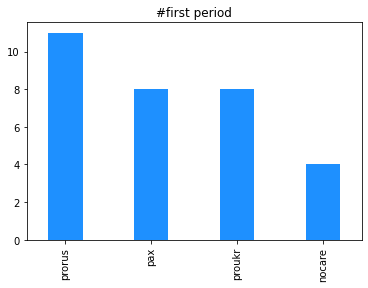

In [25]:
df['cat1'].value_counts().plot(kind='bar', width=0.4, color='dodgerblue')
plt.title('#first period')
plt.show()

In [ ]:
df['country'].value_counts().plot(kind='bar')
plt.show()

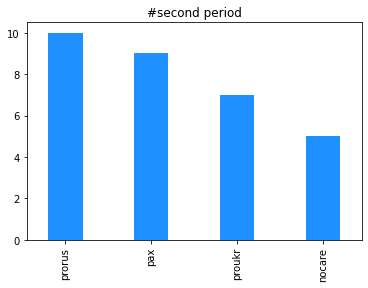

In [26]:
df['cat2'].value_counts().plot(kind='bar', width=0.4, color='dodgerblue')
plt.title('#second period')
plt.show()

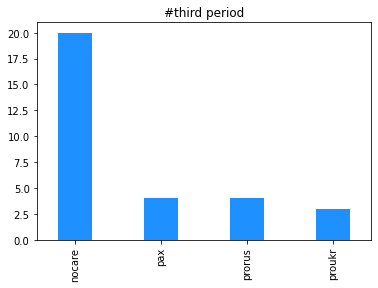

In [27]:
df['cat3'].value_counts().plot(kind='bar', width=0.4, color='dodgerblue')
plt.title('#third period')
plt.show()

In [34]:
t0=df['cat1'].value_counts().to_dict()
t1=df['cat2'].value_counts().to_dict()
t2=df['cat3'].value_counts().to_dict()
t=(t0,t1,t2)
t

({'prorus': 11, 'pax': 8, 'proukr': 8, 'nocare': 4},
 {'prorus': 10, 'pax': 9, 'proukr': 7, 'nocare': 5},
 {'nocare': 20, 'pax': 4, 'prorus': 4, 'proukr': 3})

In [44]:
prorus=[]
pax=[]
proukr=[]
nocare=[]
for d in t:    
    for cat, count in d.items():
        if cat=='prorus':
            prorus.append(count)
        elif cat=='pax':
            pax.append(count)
        elif cat=='proukr':
            proukr.append(count)
        elif cat=='nocare':
            nocare.append(count)
dict_t={}
dict_t['prorus']=prorus
dict_t['pax']=pax
dict_t['proukr']=proukr
dict_t['nocare']=nocare
dict_t

{'prorus': [11, 10, 4],
 'pax': [8, 9, 4],
 'proukr': [8, 7, 3],
 'nocare': [4, 5, 20]}

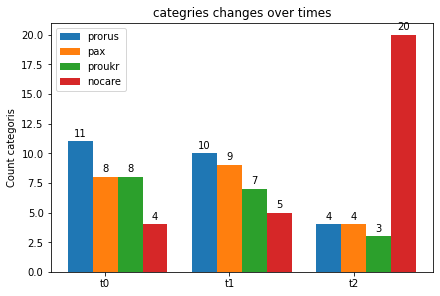

In [50]:
time_stamps=('t0','t1','t2')
x = np.arange(len(time_stamps))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True)
   
for cat, count in dict_t.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=cat)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count categoris')
ax.set_title('categries changes over times')
ax.set_xticks(x + width, time_stamps)
ax.legend(loc='upper left')
#ax.set_ylim(0, 250)

plt.show()

## States from t0 to t1

In [51]:
matrix=markov(df,'cat1','cat2')
print('Transactional matrix from t0 to t1')
matrix

Transactional matrix from t0 to t1


array([[0.25806452, 0.        , 0.        , 0.03225806],
       [0.        , 0.32258065, 0.        , 0.        ],
       [0.03225806, 0.        , 0.22580645, 0.        ],
       [0.        , 0.        , 0.        , 0.12903226]])

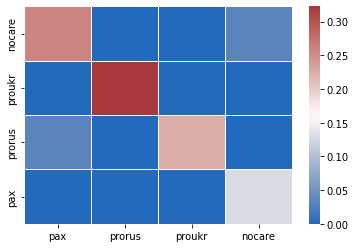

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(matrix, linewidth=0.5,cmap="vlag")
ax.set_xticklabels(['pax','prorus','proukr','nocare'])
ax.set_yticklabels(['nocare','proukr','prorus','pax']) 
plt.show()

In [53]:
states=['pax','prorus','proukr','nocare']

transition=[['pax','pax'],['pax','prorus'],['pax,proukr'],['pax','nocare'],
       ['prorus','pax'],['prorus','prorus'],['prorus,proukr'],['prorus','nocare'],
       ['proukr','pax'],['proukr','prorus'],['proukr,proukr'],['proukr','nocare']]

P=markov(df,'cat1','cat2')

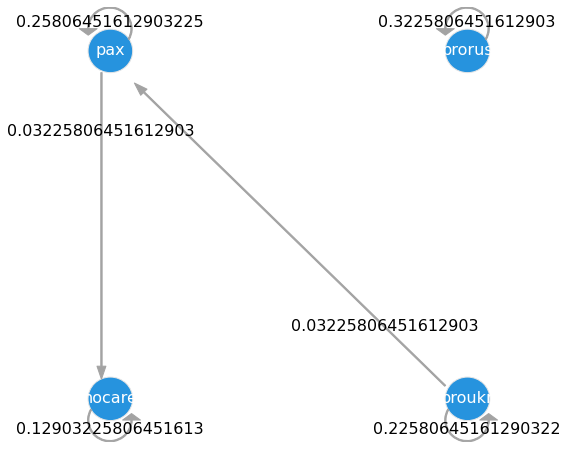

In [54]:
mc = MarkovChain(P, states)
mc.draw()

## From t1 to t2

In [55]:
matrix=markov(df,'cat2','cat3')
print('Transactional matrix from t2 to t3')
matrix

Transactional matrix from t2 to t3


array([[0.06451613, 0.        , 0.03225806, 0.38709677],
       [0.        , 0.12903226, 0.        , 0.        ],
       [0.03225806, 0.        , 0.06451613, 0.12903226],
       [0.03225806, 0.        , 0.        , 0.12903226]])

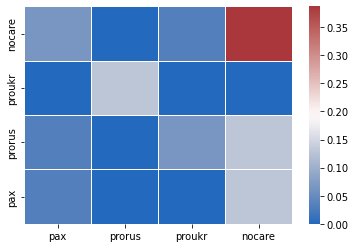

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(matrix, linewidth=0.5,cmap="vlag")
ax.set_xticklabels(['pax','prorus','proukr','nocare'])
ax.set_yticklabels(['nocare','proukr','prorus','pax']) 
plt.show()

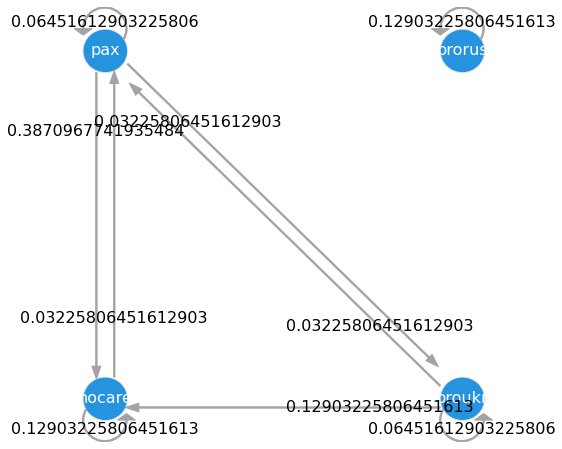

In [58]:
P=markov(df,'cat2','cat3')
mc = MarkovChain(P, states)
mc.draw()

## Total state changes

In [59]:
matrix=markov(df,'cat1','cat3')
print('Transactional matrix from t0 to t2')
matrix

Transactional matrix from t0 to t2


array([[0.06451613, 0.        , 0.03225806, 0.35483871],
       [0.03225806, 0.12903226, 0.        , 0.        ],
       [0.03225806, 0.        , 0.06451613, 0.16129032],
       [0.        , 0.        , 0.        , 0.12903226]])

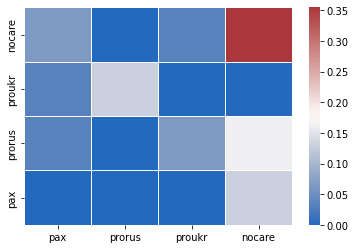

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(matrix, linewidth=0.5,cmap="vlag")
ax.set_xticklabels(['pax','prorus','proukr','nocare'])
ax.set_yticklabels(['nocare','proukr','prorus','pax']) 
plt.show()

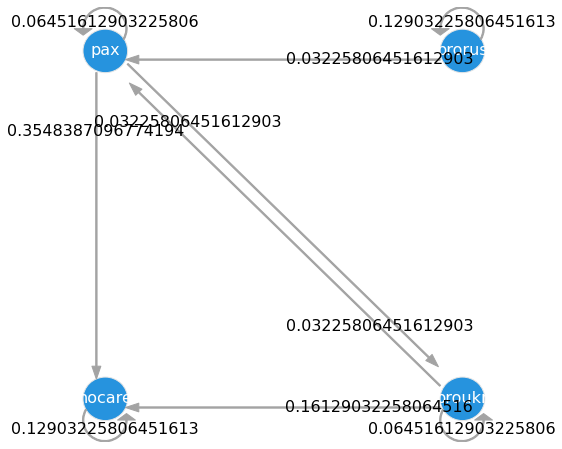

In [62]:
P=markov(df,'cat1','cat3')
mc = MarkovChain(P, states)
mc.draw()